In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction import FeatureHasher
import sys
sys.path.append('../')
from lib.processing_functions import convert_to_pandas

# Data transformations

## Ouline

Goal: Show how scikit-learn's data transformers can be used to generate suitable feature representations for model fitting.

Key topics:
    
- **Feature extraction**: extract feature repesentations from data like text and images
- **Preprocessing**: preprocessing of feature vectors into a suitable format for machine learning algorithms
- **Pipelines**: chain a set of transformers and estimators into a data pipeline 

## Estimators versus transformers

A transformer is an estimator for unsupervised learning problems:

- it implements the `fit()` method for learning estimated model parameters
- estimated model parameters are stored as attributes ending with an underscore: `est_param_`
- learned models can be applied using the `transform()` method
- allow simultaneous modelling and transforming through the `fit_transform()` method 

## Feature extraction

Transform data, such as text or images, into numerical features that are usable for machine learning algorithms.

### Tools for feature extraction

Scikit-learn has several tools for doing feature extraction:

- **`DictVectorizer`**: turns lists of mappings (dict-like objects) of feature names to feature values into Numpy arrays or scipy.sparse matrices

In [2]:
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
X

array([[ 2.,  0.,  1.],
       [ 0.,  1.,  3.]])

### Tools for feature extraction

Scikit-learn has several tools for doing feature extraction:

- **`FeatureHasher`**: turns sequences of symbolic feature names (strings) into scipy.sparse matrices

In [3]:
h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat': 2, 'elephant': 4},{'dog': 2, 'run': 5}]
f = h.transform(D)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

### Tools for feature extraction

Scikit-learn has several tools for doing feature extraction:

- **`feature_extraction.image`**: submodule that provides utilities for feature extraction from images
- **`feature_extraction.text`**: submodule that provides utilities for feature extraction from text

Next we will show one of the extractors for text.

### Bag of Words

This strategy of tokenization, counting and normalization of text is called the Bag of Words or “Bag of n-grams” representation:

![bow](../images/bag-of-words.png)

## Count vectorizer

Transformer that converts a collection of text documents to a sparse matrix of token counts, implementing both tokenization and occurrence counting:

    text.CountVectorizer(strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, ...)


### Count vectorizer example
Apply `CountVectorizer` to extract uni- and bi-grams from the corpus below and show the built vocabulary: 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?']

vec = CountVectorizer(ngram_range=(1,2))
X = vec.fit_transform(corpus)

print("vectorizer vocabulary:\n{}".format(vec.vocabulary_))
print("\nshape of X: {}".format(X.shape))


vectorizer vocabulary:
{'this': 18, 'is': 5, 'the': 12, 'first': 3, 'document': 2, 'this is': 19, 'is the': 6, 'the first': 13, 'first document': 4, 'second': 9, 'the second': 14, 'second second': 11, 'second document': 10, 'and': 0, 'third': 16, 'one': 8, 'and the': 1, 'the third': 15, 'third one': 17, 'is this': 7, 'this the': 20}

shape of X: (4, 21)


Now built a vectorizer that filters English stop words:

In [5]:
vec = CountVectorizer(ngram_range=(1,2), stop_words='english')
X = vec.fit_transform(corpus)

print("vectorizer vocabulary: {}".format(vec.vocabulary_))
print("X:\n{}".format(X.toarray()))

vectorizer vocabulary: {'document': 0, 'second': 1, 'second second': 3, 'second document': 2}
X:
[[1 0 0 0]
 [1 2 1 1]
 [0 0 0 0]
 [1 0 0 0]]


What happens if we transform a document containing a word that is not in the vocabulary?

In [6]:
X_new = vec.transform(["A second unknown document."])

print("X_new: {}".format(X_new.toarray()))
print("inverse X_new: {}".format(vec.inverse_transform(X_new)[0]))

X_new: [[1 1 0 0]]
inverse X_new: ['document' 'second']


## Preprocessing

Raw feature vectors often need to be preprocessed before being fed to an estimator:

- in order to convert features into a more suitable representation for the estimator
- operations include scaling, centering, normalization, binarization and imputation

Note that many of scikit-learn's preprocessing transformers work efficiently with sparse data.

### Tools for preprocessing data

Scikit learn provides amongst others the following tools for preprocessing:

- **`StandardScaler`**: standardize the data to zero mean and unit variance
- **`Normalizer`**: normalize each sample to have unit norm
- **`Imputer`**: complete missing values in the data
- **`OneHotEncoder`**: one-hot encode categorical values as binary representations
- **`PolynomialFeatures`**: create a set of polynomial and interaction features

Next we will describe some of these tools in more detail.

## Standard scaler

Transformer that standardizes each feature to zero mean and unit variance, a common requirement for machine learning algorithms:
   
```
preprocessing.StandardScaler(with_mean=True, with_std=True, copy=True)
```

### Standard scaler example

Load the Boston dataset and standardize all the features using the `StandardScaler`:

In [7]:
from sklearn.preprocessing import StandardScaler

X, y = convert_to_pandas(datasets.load_boston())

scaler = StandardScaler().fit(X)

X_scaled = pd.DataFrame(
    scaler.transform(X), columns=X.columns)

X_scaled.describe()

features,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,0.000000,6.319056e-17,-3.145486e-15,-2.106352e-17,2.752300e-15,-1.150770e-14,-1.137430e-15,7.582867e-16,5.616939e-17,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16
std,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-0.417713,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-0.408896,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-0.388582,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,0.006248,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.941735,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


Show the histograms of the original and scaled RM feature in the dataset:

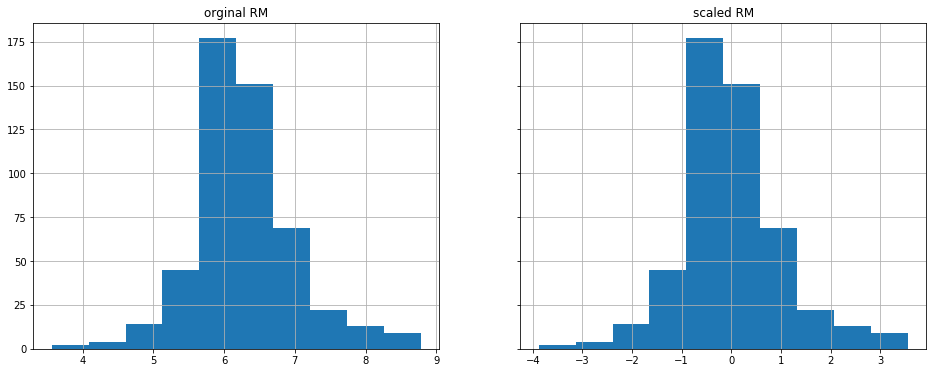

In [8]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(16, 6))
X.RM.hist(ax=axes[0])
axes[0].set_title('orginal RM')
X_scaled.RM.hist(ax=axes[1])
axes[1].set_title('scaled RM');

## Imputer of missing data

Transformer that completes missing values in the dataset:

```
preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0, ...)
```

### Imputer example:

Impute the missing values in the data below with the sample mean:

In [9]:
from sklearn.preprocessing import Imputer

X = pd.DataFrame([[1, 2, 3], [None, 3, 4], [6, 7, 8]])

imputer = Imputer(strategy='mean', axis=1).fit(X)

X_imputed = imputer.transform(X)

print("imputed X:\n{}".format(X_imputed))

imputed X:
[[ 1.   2.   3. ]
 [ 3.5  3.   4. ]
 [ 6.   7.   8. ]]


## One-hot encoder

Transformer that encodes integer categorical features using a one-hot (also know as one-of-K) coding scheme:

    preprocessing.OneHotEncoder(categorical_features='all', sparse=True, handle_unknown='error', ...)

Usage details:

- if only specific features should be encoded, pass the indices or a mask into the `categorical_features` parameter, otherwise all features are encoded
- the default output will be sparse unless `sparse` is `False`
- an error will be raised when an unkown feature is presented during transform; to ignore, set `handle_unkown` to 'ignore'

### One-hot encoder example

One-hot encode the color column in the dataframe below using one-hot encoding: 

In [10]:
X = pd.DataFrame(
    [['red',1.5],['yellow',1.1], ['blue', 1.]], columns=['color','radius'])
X

,color,radius
0,red,1.5
1,yellow,1.1
2,blue,1.0


First, convert the categorical values into integers:

In [11]:
from sklearn.preprocessing import LabelEncoder
X_int = X.copy()
X_int.color = LabelEncoder().fit_transform(X.color)
X_int

,color,radius
0,1,1.5
1,2,1.1
2,0,1.0


Finally, apply one-hot encoding to first feature:

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categorical_features=[0])
    
X_onehot = encoder.fit_transform(X_int)

print("one-hot X:\n{}".format(X_onehot.todense()))

one-hot X:
[[ 0.   1.   0.   1.5]
 [ 0.   0.   1.   1.1]
 [ 1.   0.   0.   1. ]]


Easier and faster Pandas alternative? 

In [13]:
pd.get_dummies(X)

,radius,color_blue,color_red,color_yellow
0,1.5,0,1,0
1,1.1,0,0,1
2,1.0,1,0,0


## Pipelines

The `sklearn.pipeline` module facilitates the creation of a data pipeline; it chains multiple estimators/transformers together.

Main reasons for using pipelines:

- **Convenience**: only one call necessary to `fit` or `predict` a whole sequence of estimator objects
- **Joint parameter selection**: allows grid search over parameters of all objects in the pipeline at once


The parameters of the objects in the various steps can be accessed through the `stepname__param` attributes.

There are two functions for building pipelines:

- **`pipeline.Pipeline`**: takes a list of `(key, value)` pairs, where the key is the name of a step and value the estimator object
- **`pipeline.make_pipeline`**: is a shorthand for constructing pipelines; this function can fill out the step names automatically

All estimators in a pipeline must be transformers except for the last one; the last estimator may be of any type (transformer, classifier, etc.)


### Pipeline example

Use `Pipeline` to build an estimator that first standardizes the data and then perform Lasso regression:

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([("scaler", StandardScaler()),
                     ("lasso", Lasso())])

pipeline

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

Use `GridSearchCV` to optimize both steps while fitting on the Boston dataset and show the best estimator:

In [15]:
from sklearn.model_selection import GridSearchCV

X, y = convert_to_pandas(datasets.load_boston())

params = dict(lasso__alpha=[0.01, 0.1, 1, 10],
              scaler__with_std=[True, False],
              scaler__with_mean=[True, False],)

grid_search = GridSearchCV(
    pipeline, param_grid=params, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print(grid_search.best_estimator_)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=False)), ('lasso', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])


## Feature union

Feature unions combine the results of multiple transformers into a single output. In contrast to a pipeline, it operates in parallel, not series.

Build a feature union transformer using:

    pipeline.FeatureUnion(transformer_list, n_jobs=1, transformer_weights=None)

Usage is similar to `Pipeline`, except that it also allows weighting of the different transformer ouputs.

### Feature union example

Create a feature union that applies both the `Binarizer` and `Normalizer` separately on the data below:

In [16]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Binarizer, Normalizer

X = np.arange(6).reshape(3, 2).astype(float)

In [17]:
X

array([[ 0.,  1.],
       [ 2.,  3.],
       [ 4.,  5.]])

In [18]:
features = FeatureUnion(
    [('bin',Binarizer(threshold=2)),('norm', Normalizer())])
X_feat = features.fit_transform(X)

print("X:\n{}".format(X))
print("X_feat:\n{}".format(X_feat))

X:
[[ 0.  1.]
 [ 2.  3.]
 [ 4.  5.]]
X_feat:
[[ 0.          0.          0.          1.        ]
 [ 0.          1.          0.5547002   0.83205029]
 [ 1.          1.          0.62469505  0.78086881]]


## Creating your own estimators

There are situations when you'll want to create your own models and transformers:

+ your problem may ask for a classifier that's not in `sklearn`
+ you'll have a specific way of transforming features
+ you might want to optimize the parameters of your intricate preprocessing flow.

Putting your logic in objects that are similar to those of `sklearn` allows you leverage all the functionality in `sklearn`. 

If we want to create our own transformers or models, we'll have to create an estimator object.
The estimator is one of the main concept behind `sklearn`'s API and encompasses both models and transformers:

> "An estimator learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data."

If you want to create your own estimator that complies with the `sklearn` API, inherit from the `base.BaseEstimator` and one of the following mixin classes:

* `base.ClassifierMixin`
* `base.RegressorMixin`
* `base.ClusterMixin`
* `base.TransformerMixin`

or a more specialized base mixin classes (e.g. `sklearn.linear_model.base.LinearClassifierMixin`)

The [`base.BaseEstimator`](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) imbues your estimator with the functionality of getting and setting (hyper-)parameters. The mixin classes add basic interfaces to the `base.Estimator` required for a classifier or a model. For instance, the `base.TransformerMixin` class adds the method `fit_transform()` that chains `fit()` and `transform()` in one call.

More details on what method is required and which method should return what, see the documentation on [Rolling your own estimator](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator). The concept of mixin classes is demonstrated in the [Python Cookbook](https://d.cxcore.net/Python/Python_Cookbook_3rd_Edition.pdf).

In [19]:
import datetime
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


class HourOfDayTransformer(BaseEstimator, TransformerMixin):

    def transform(self, X, **transform_params):
        hours = [d.hour for d in X]
        return hours

    def fit(self, X, y=None, **fit_params):
        return self


data = [datetime.datetime(2016, 1, 1, 1, 0), 
        datetime.datetime(2016, 1, 1, 2, 0)]

transfomer = HourOfDayTransformer()
transfomer.fit_transform(data)

[1, 2]

#### Notes

* Multiple inheritance works from left to right.
* Be careful with multiple inheritance. You don't want to end up with a [diamond of death](http://www.python-course.eu/images/multiple_inheritance_diamond.png) where you don't know from which class a method was inherited from.
* When calling `__init__` from a parent class, use:

```python
# Python 2
class Classname(OldStyleParent):
    def __init__(self, *args, **kwargs):
        OldStyleParent.__init__(self, *args, **kwargs)
        
        
# Python 3
class Classname(NewStyleParent):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
```

# Review 

1. What does an `Imputer` do? 
2. What does a `CountVectorizer` do?
3. If you have multiple data transformations before your ML algorithm, what is the nicest way to bundle these steps together? 

### Exercises: [lab 6 - Data transformation](../labs/lab_06_data_transformation.ipynb)